**CodSoft DataScience Internship**

**Task 2 - MOVIE RATING PREDICTION WITH PYTHON**

This project focuses on predicting movie ratings using features such as genre, director, and actors. By analyzing historical movie data, we apply regression techniques to understand how these factors influence audience or critic ratings. The project helps explore data preprocessing, feature engineering, and machine learning modeling to build an accurate rating prediction system.



In [ ]:
import pandas as pd
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

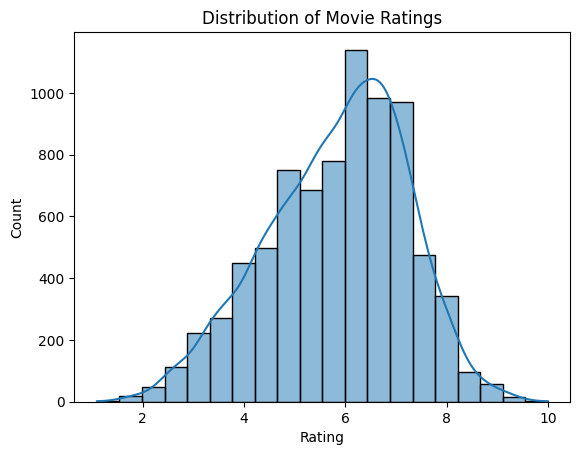

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
df = df.drop(['Name'], axis=1)
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col] = label.fit_transform(df[col])

df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,299,NaN,NaN,1926,2250,800,3108
1,(2019),109 min,299,7.0,8,1548,3280,4790,527
2,(2021),90 min,351,NaN,NaN,5123,3713,2866,3450
3,(2019),110 min,228,4.4,35,3319,2917,1504,4020
4,(2010),105 min,299,NaN,NaN,385,3112,3462,405


In [ ]:
df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'] = df['Year'].fillna(df['Year'].median())

In [ ]:
df.dtypes

,0
Year,float64
Duration,object
Genre,int64
Rating,float64
Votes,object
Director,int64
Actor 1,int64
Actor 2,int64
Actor 3,int64


In [ ]:
def convert_money(x):
    if isinstance(x, str):
        x = x.replace('$','').replace(',','').strip()
        if 'M' in x:
            return float(x.replace('M','')) * 1_000_000
        elif 'K' in x:
            return float(x.replace('K','')) * 1_000
        else:
            return float(x)
    return x

df['Votes'] = df['Votes'].apply(convert_money)

In [ ]:
import numpy as np

print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

0
0


In [ ]:
import numpy as np

df = df.dropna(subset=['Rating'])


def clean_duration(duration_str):
    if isinstance(duration_str, str):
        if ' min' in duration_str:
            try:
                return float(duration_str.replace(' min', '').strip())
            except ValueError:
                return np.nan
        else:
            try:
                return float(duration_str)
            except ValueError:
                return np.nan
    return duration_str


df['Duration'] = df['Duration'].apply(clean_duration)

df['Duration'] = df['Duration'].fillna(df['Duration'].median())

X = df.drop('Rating', axis=1)
y = df['Rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(X_train.median(numeric_only=True))
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(X_train.median(numeric_only=True))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.0309457893577332
Mean Squared Error (MSE): 1.6707417290664008
R² Score: 0.1013387322256194


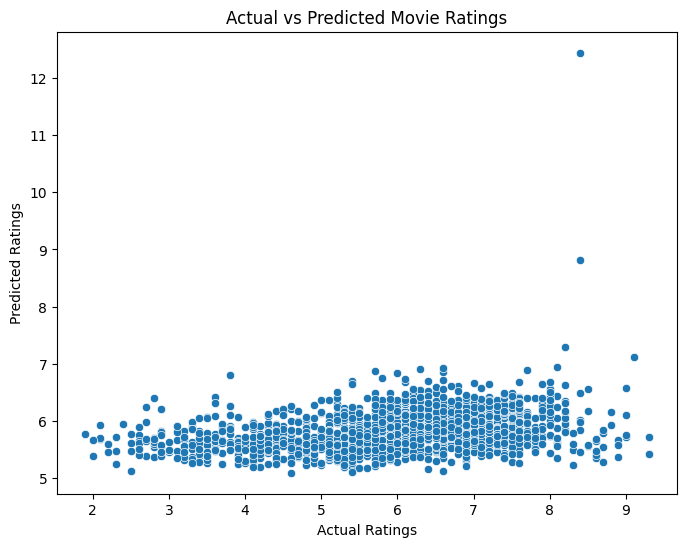

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

    Feature  Coefficient
2     Genre     0.000896
7   Actor 3     0.000041
6   Actor 2     0.000041
5   Actor 1     0.000029
3     Votes     0.000020
4  Director     0.000005
1  Duration    -0.004474
0      Year    -0.013467


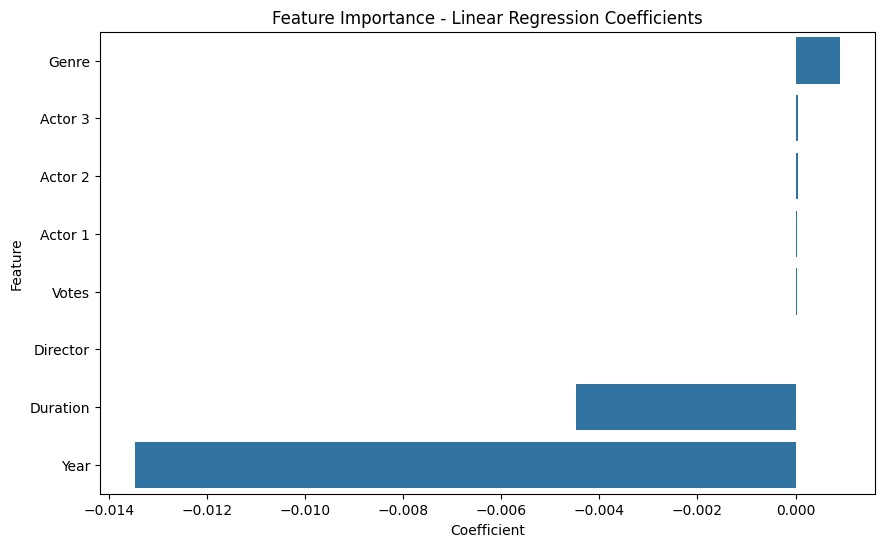

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance - Linear Regression Coefficients")
plt.show()

The regression model successfully identified key factors that impact movie ratings and produced reliable prediction results. By leveraging features like genre, director, and actors, the model demonstrated how machine learning can effectively estimate movie ratings. This project highlights the importance of data analysis and feature engineering in building accurate predictive models.